In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from data_loader import PybulletNpyDataset

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.models import resnet18, resnet34, resnet50

## Full RGB

In [3]:
resnet = resnet18
model_path = 'data/classification/noft_best.pth' #'finetune_29.pth' #'noft_29.pth' #'model_29.pth'
data_path = '/ssd/disk/ur5_tidying_data/pybullet_line/test'
device = "cuda:0"

dataset = PybulletNpyDataset(data_dir=data_path)
dataset.fsize = 200
dataloader = DataLoader(dataset, batch_size=16, shuffle=False, num_workers=1)

model = resnet(pretrained=False)
fc_in_features = model.fc.in_features

model.fc = nn.Sequential(
    nn.Linear(fc_in_features, 1),
    nn.Sigmoid()
)
model.load_state_dict(torch.load(model_path))
model.to(device)
model.eval()

preprocess = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

Score >  0.95


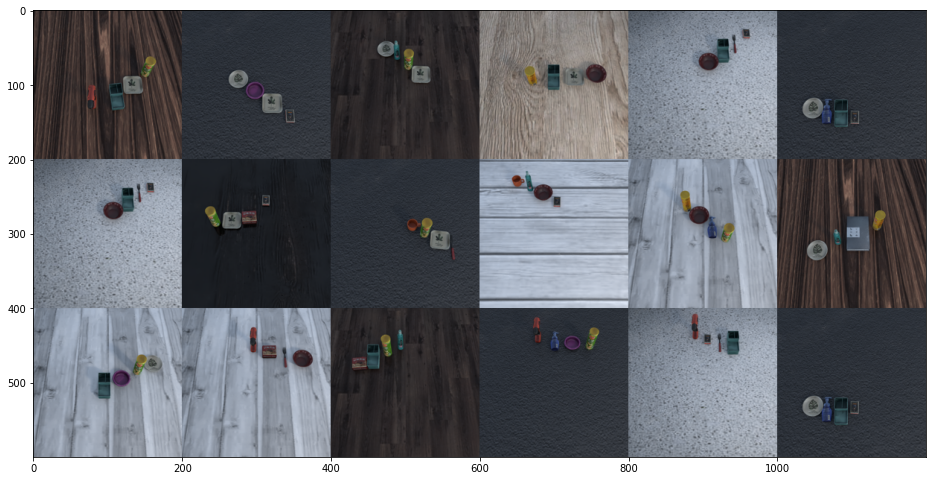

Score <  0.05


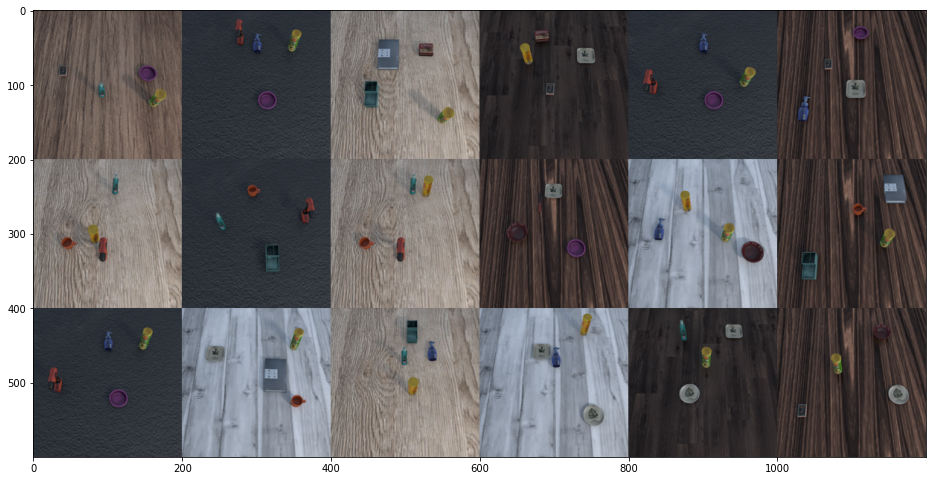

In [14]:
over = 0.95
under = 0.05
scene_over = []
scene_under = []

dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=1)

count = 0
for X_val, Y_val in dataloader:
    x_raw = X_val.cpu().numpy().transpose([0, 2, 3, 1])
    X_val = preprocess(X_val).to(device)
    Y_val = Y_val[:, 0].to(device)
    y_pred = model(X_val)[:, 0].detach().cpu().numpy()
    
    scene_over.append(x_raw[y_pred>over])
    scene_under.append(x_raw[y_pred<under])
    count += 1
    
scene_over = np.concatenate(scene_over, axis=0)
scene_under = np.concatenate(scene_under, axis=0)

print("Score > ", over)
scene_vstack = []
fig = plt.figure(figsize=(16, 9))
for i in range(3):
    scene_hstack = np.concatenate(scene_over[i*6: i*6+6], axis=1)
    scene_vstack.append(scene_hstack)
scene_patches = np.concatenate(scene_vstack, axis=0)
plt.imshow(scene_patches)
plt.show()

print("Score < ", under)
scene_vstack = []
fig = plt.figure(figsize=(16, 9))
for i in range(3):
    scene_hstack = np.concatenate(scene_under[i*6: i*6+6], axis=1)
    scene_vstack.append(scene_hstack)
scene_patches = np.concatenate(scene_vstack, axis=0)
plt.imshow(scene_patches)
plt.show()

Score: 0.99357903


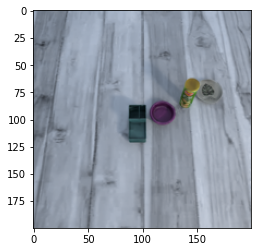

Score: 0.06445152


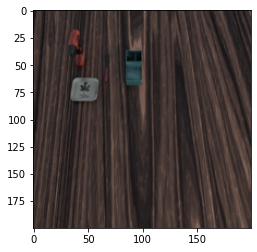

Score: 0.062768154


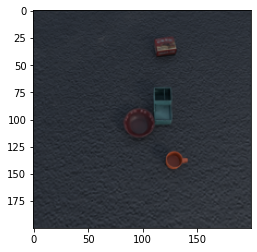

Score: 0.5413759


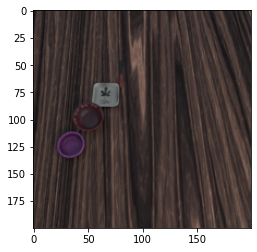

Score: 0.8273533


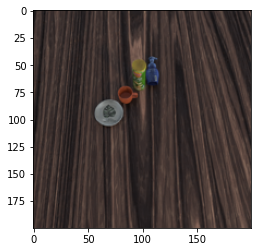

Score: 0.9414153


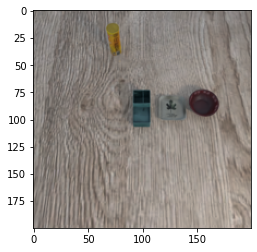

Score: 0.00859533


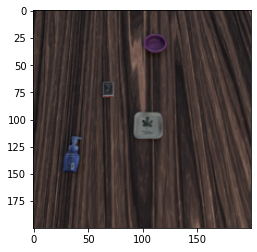

Score: 0.8844764


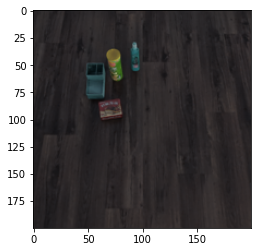

Score: 0.077291325


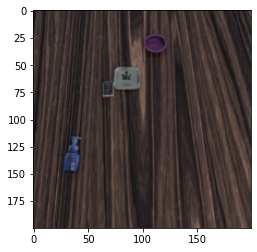

Score: 0.046042886


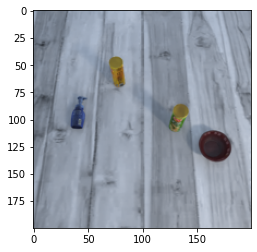

Score: 0.98886395


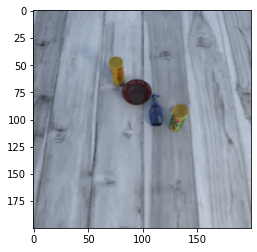

Score: 0.97365665


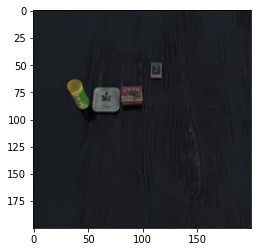

Score: 0.566526


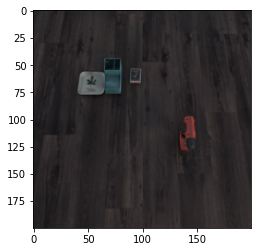

Score: 0.030925635


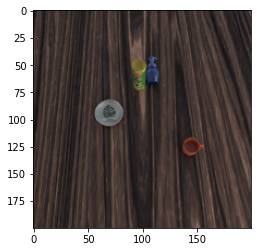

Score: 0.107845716


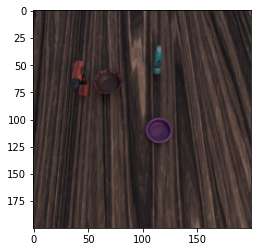

Score: 0.92985


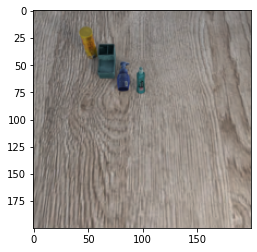

Score: 0.4840622


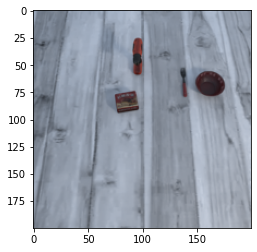

Score: 0.28442764


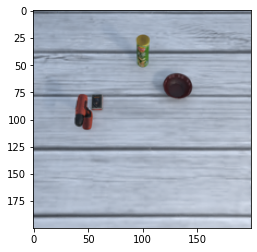

Score: 0.15251733


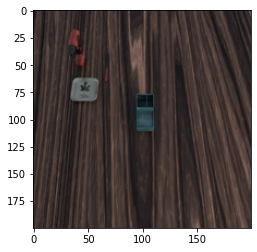

Score: 0.60084426


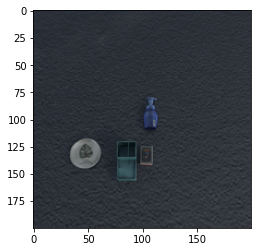

Score: 0.16548909


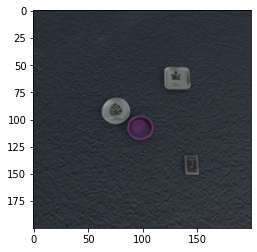

Score: 0.0042716204


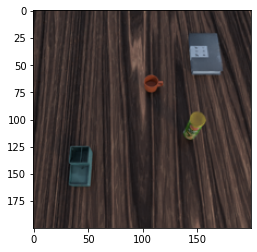

Score: 0.39229658


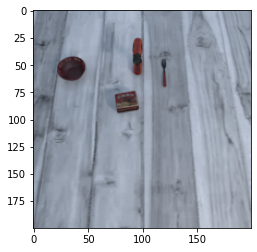

Score: 0.2750521


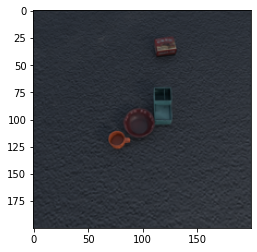

Score: 0.58981025


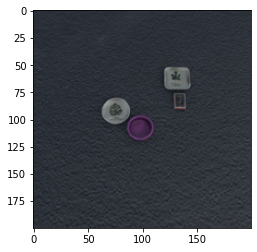

Score: 0.76255083


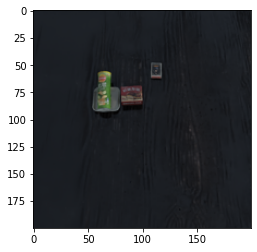

Score: 0.88530254


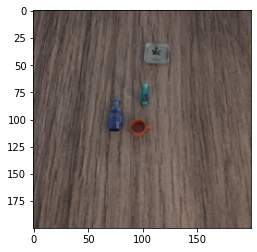

Score: 0.08311667


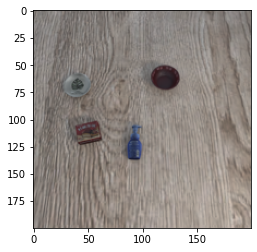

Score: 0.2978176


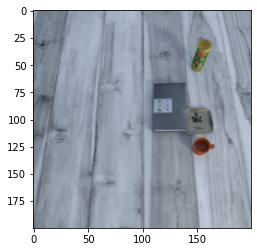

Score: 0.66554505


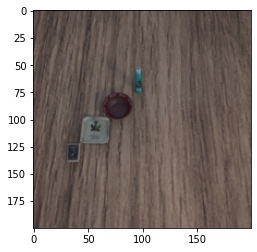

Score: 0.940809


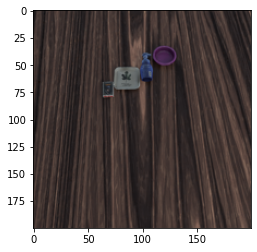

Score: 0.239443


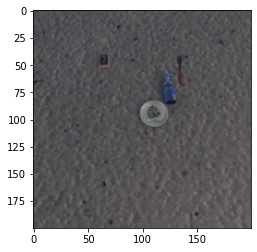

Score: 0.34410194


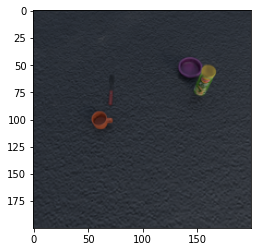

Score: 0.4281149


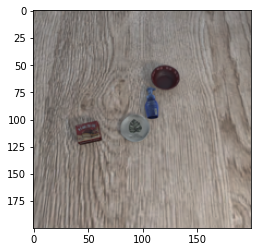

Score: 0.24255776


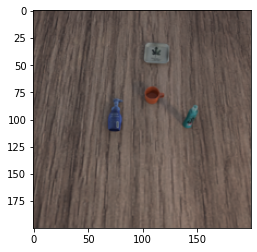

Score: 0.106760055


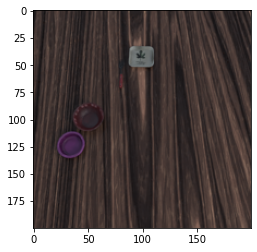

Score: 0.2946148


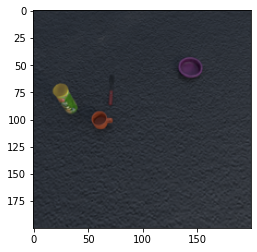

Score: 0.052079264


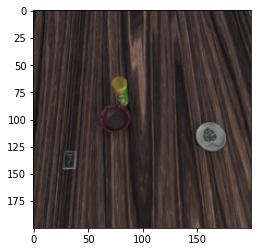

Score: 0.27282444


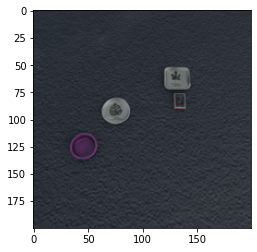

Score: 0.34221324


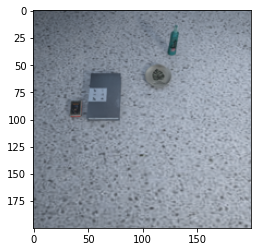

Score: 0.62531626


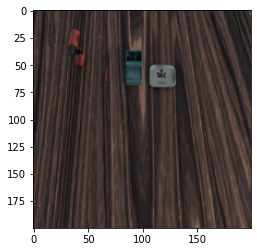

Score: 0.64021236


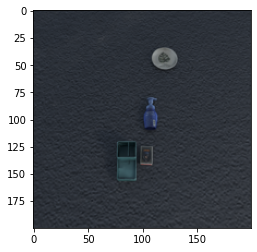

Score: 0.72655815


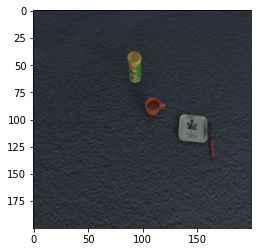

Score: 0.13874766


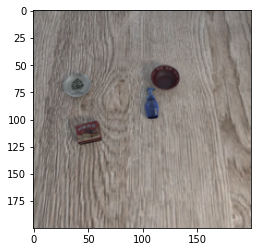

Score: 0.051286522


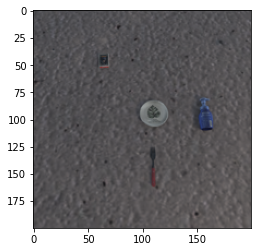

Score: 0.21426323


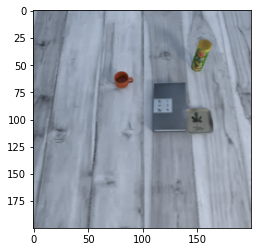

Score: 0.95883024


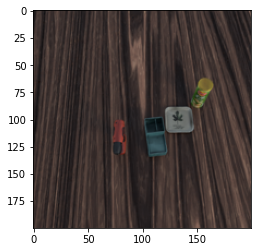

Score: 0.005080558


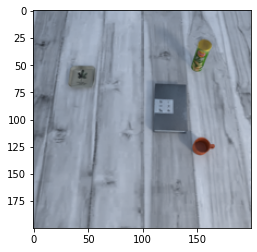

In [11]:
count = 0
for X_val, Y_val in dataloader:
    x_raw = X_val.cpu().numpy().transpose([0, 2, 3, 1])
    X_val = preprocess(X_val).to(device)
    Y_val = Y_val[:, 0].to(device)
    y_pred = model(X_val)[:, 0].detach().cpu().numpy()
    
    for i in range(12):
        print("Score:", y_pred[i])
        plt.imshow(x_raw[i])
        plt.show()
    count += 1
    if count > 3:
        break

## Remove BG

In [20]:
resnet = resnet18
model_path = 'data/classification/mse_nobg_best.pth' #'finetune_29.pth' #'noft_29.pth' #'model_29.pth'
data_path = '/ssd/disk/ur5_tidying_data/pybullet_single_bg/test'
device = "cuda:0"

dataset = PybulletNpyDataset(data_dir=data_path)
dataset.fsize = 200
dataloader = DataLoader(dataset, batch_size=16, shuffle=False, num_workers=1)

model = resnet(pretrained=False)
fc_in_features = model.fc.in_features

model.fc = nn.Sequential(
    nn.Linear(fc_in_features, 1),
    nn.Sigmoid()
)
model.load_state_dict(torch.load(model_path))
model.to(device)
model.eval()

preprocess = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

Score >  0.65


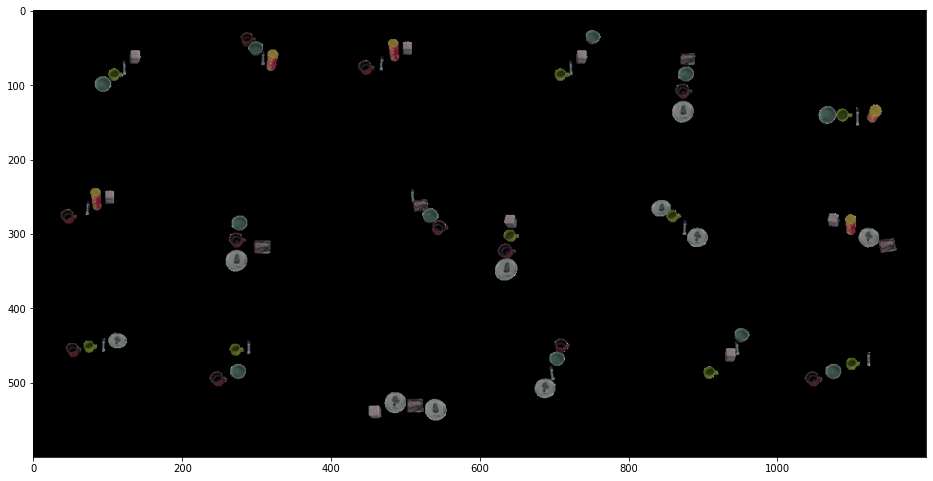

Score <  0.6


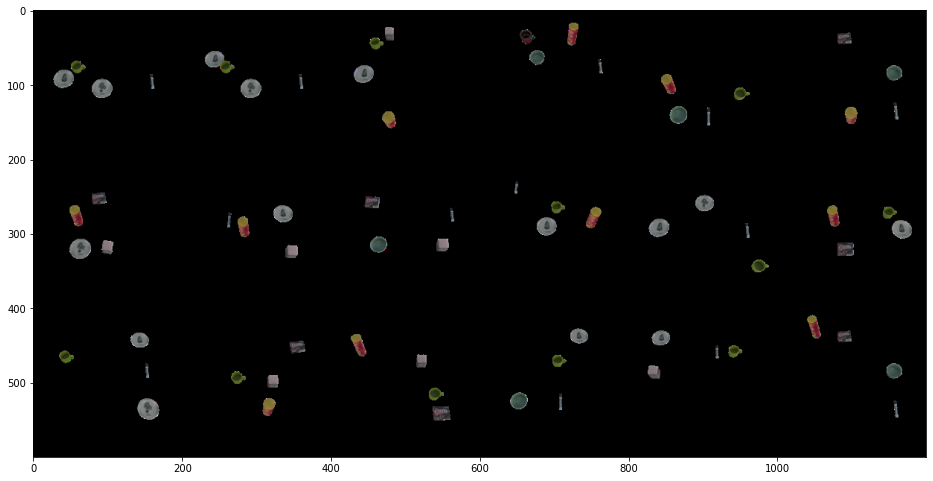

In [26]:
over = 0.65
under = 0.6
scene_over = []
scene_under = []

dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=1)

count = 0
for X_val, Y_val in dataloader:
    x_raw = X_val.cpu().numpy().transpose([0, 2, 3, 1])
    X_val = preprocess(X_val).to(device)
    Y_val = Y_val[:, 0].to(device)
    y_pred = model(X_val)[:, 0].detach().cpu().numpy()
    
    scene_over.append(x_raw[y_pred>over])
    scene_under.append(x_raw[y_pred<under])
    count += 1
    
scene_over = np.concatenate(scene_over, axis=0)
scene_under = np.concatenate(scene_under, axis=0)

print("Score > ", over)
scene_vstack = []
fig = plt.figure(figsize=(16, 9))
for i in range(3):
    scene_hstack = np.concatenate(scene_over[i*6: i*6+6], axis=1)
    scene_vstack.append(scene_hstack)
scene_patches = np.concatenate(scene_vstack, axis=0)
plt.imshow(scene_patches)
plt.show()

print("Score < ", under)
scene_vstack = []
fig = plt.figure(figsize=(16, 9))
for i in range(3):
    scene_hstack = np.concatenate(scene_under[i*6: i*6+6], axis=1)
    scene_vstack.append(scene_hstack)
scene_patches = np.concatenate(scene_vstack, axis=0)
plt.imshow(scene_patches)
plt.show()

In [28]:
count = 0
for X_val, Y_val in dataloader:
    x_raw = X_val.cpu().numpy().transpose([0, 2, 3, 1])
    X_val = preprocess(X_val).to(device)
    Y_val = Y_val[:, 0].to(device)
    y_pred = model(X_val)[:, 0].detach().cpu().numpy()
    
    for i in range(12):
        print("Score:", y_pred[i])
        plt.imshow(x_raw[i])
        plt.show()
    count += 1
    if count > 3:
        break

In [30]:
x_raw.max()

1.0

## Replace BG

In [10]:
resnet = resnet18
model_path = 'data/classification/rmbg_best.pth' #'finetune_29.pth' #'noft_29.pth' #'model_29.pth'
data_path = '/ssd/disk/ur5_tidying_data/pybullet_remove_bg/test'
device = "cuda:0"

dataset = PybulletNpyDataset(data_dir=data_path)
dataset.fsize = 200
dataloader = DataLoader(dataset, batch_size=16, shuffle=False, num_workers=1)

model = resnet(pretrained=False)
fc_in_features = model.fc.in_features

model.fc = nn.Sequential(
    nn.Linear(fc_in_features, 1),
    nn.Sigmoid()
)
model.load_state_dict(torch.load(model_path))
model.to(device)
model.eval()

preprocess = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

Score >  0.8


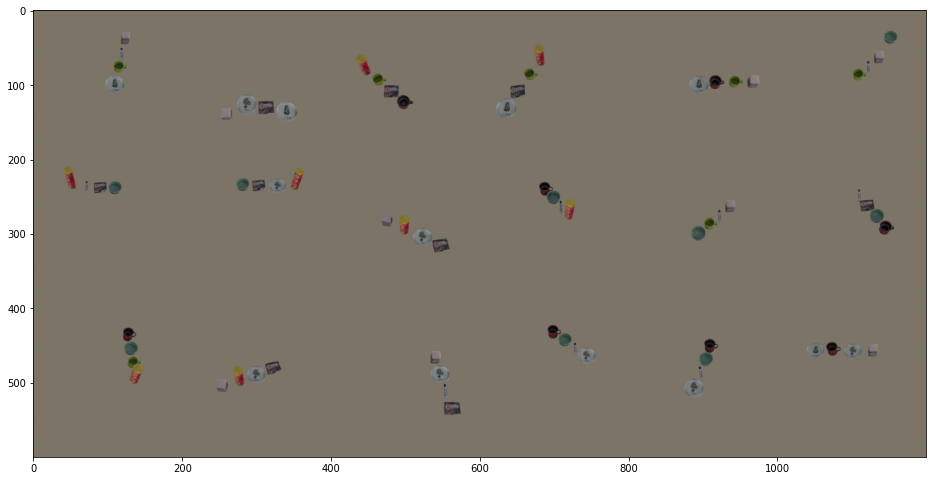

Score <  0.1


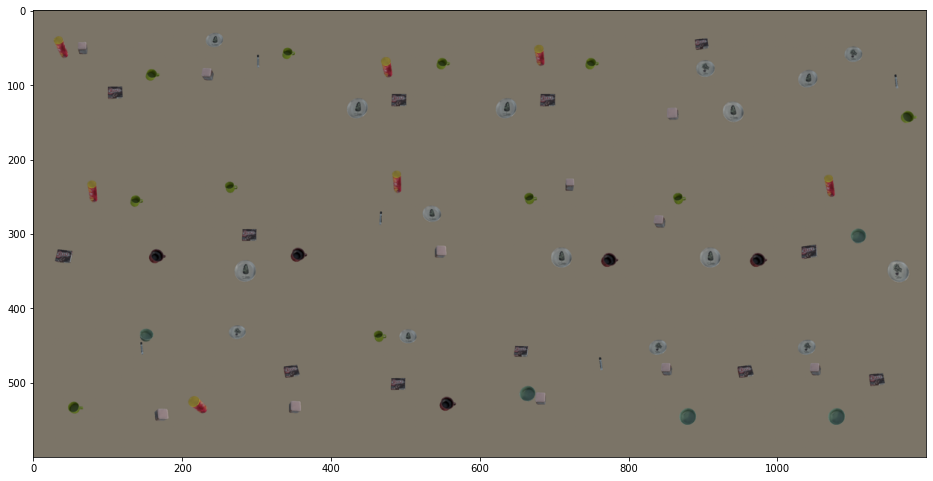

In [15]:
over = 0.8
under = 0.1
scene_over = []
scene_under = []

dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=1)

count = 0
for X_val, Y_val in dataloader:
    x_raw = X_val.cpu().numpy().transpose([0, 2, 3, 1])
    X_val = preprocess(X_val).to(device)
    Y_val = Y_val[:, 0].to(device)
    y_pred = model(X_val)[:, 0].detach().cpu().numpy()
    
    scene_over.append(x_raw[y_pred>over])
    scene_under.append(x_raw[y_pred<under])
    count += 1
    
scene_over = np.concatenate(scene_over, axis=0)
scene_under = np.concatenate(scene_under, axis=0)

print("Score > ", over)
scene_vstack = []
fig = plt.figure(figsize=(16, 9))
for i in range(3):
    scene_hstack = np.concatenate(scene_over[i*6: i*6+6], axis=1)
    scene_vstack.append(scene_hstack)
scene_patches = np.concatenate(scene_vstack, axis=0)
plt.imshow(scene_patches)
plt.show()

print("Score < ", under)
scene_vstack = []
fig = plt.figure(figsize=(16, 9))
for i in range(3):
    scene_hstack = np.concatenate(scene_under[i*6: i*6+6], axis=1)
    scene_vstack.append(scene_hstack)
scene_patches = np.concatenate(scene_vstack, axis=0)
plt.imshow(scene_patches)
plt.show()